In [2]:
import zipfile
import requests
import numpy as np
print('numpy '+ np.__version__)
import pandas as pd
print ('pandas '+ pd.__version__)
import seaborn as sns
print('seaborn '+ sns.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


numpy 1.10.2
pandas 0.17.1
seaborn 0.6.0


## Station data
First, I can pull the station data from the citbike website. This is actually the status of the stations currently, so there may be stations online now that were not when that data was pulled.
I will request the json station data, and convert it to a pandas data frame.

In [3]:
#Station information
station_status_url = 'http://www.citibikenyc.com/stations/json'
resp=requests.get(station_status_url)
resp.json().keys()

dict_keys(['stationBeanList', 'executionTime'])

In [6]:
resp.json()['stationBeanList'][0]

{'altitude': '',
 'availableBikes': 8,
 'availableDocks': 30,
 'city': '',
 'id': 72,
 'landMark': '',
 'lastCommunicationTime': '2016-01-08 04:30:32 PM',
 'latitude': 40.76727216,
 'location': '',
 'longitude': -73.99392888,
 'postalCode': '',
 'stAddress1': 'W 52 St & 11 Ave',
 'stAddress2': '',
 'stationName': 'W 52 St & 11 Ave',
 'statusKey': 1,
 'statusValue': 'In Service',
 'testStation': False,
 'totalDocks': 39}

In [8]:
station_info = pd.DataFrame(resp.json()['stationBeanList'])
station_info.head(2)

altitude  availableBikes  availableDocks city  id landMark  \
0                        8              30       72            
1                       18              15       79            

    lastCommunicationTime   latitude location  longitude postalCode  \
0  2016-01-08 04:30:32 PM  40.767272          -73.993929              
1  2016-01-08 04:30:26 PM  40.719116          -74.006667              

                 stAddress1 stAddress2               stationName  statusKey  \
0          W 52 St & 11 Ave                     W 52 St & 11 Ave          1   
1  Franklin St & W Broadway             Franklin St & W Broadway          1   

  statusValue testStation  totalDocks  
0  In Service       False          39  
1  In Service       False          33

In [10]:
filename = 'data/201510-citibike-tripdata.zip'
with zipfile.ZipFile(filename) as myzip:
    with myzip.open(myzip.namelist()[0]) as myfile:
        cb_trip_df = pd.read_csv(myfile)
cb_trip_df.head(3)

tripduration           starttime            stoptime  start station id  \
0           171  10/1/2015 00:00:02  10/1/2015 00:02:54               388   
1           593  10/1/2015 00:00:02  10/1/2015 00:09:55               518   
2           233  10/1/2015 00:00:11  10/1/2015 00:04:05               447   

  start station name  start station latitude  start station longitude  \
0   W 26 St & 10 Ave               40.749718               -74.002950   
1    E 39 St & 2 Ave               40.747804               -73.973442   
2    8 Ave & W 52 St               40.763707               -73.985162   

   end station id     end station name  end station latitude  \
0             494      W 26 St & 8 Ave             40.747348   
1             438  St Marks Pl & 1 Ave             40.727791   
2             447      8 Ave & W 52 St             40.763707   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.997236   24302  Subscriber        1973       1  
1             -73.985649   19904  Subscriber        1990       1  
2             -73.985162   17797  Subscriber        1984       1

In [11]:
cb_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212277 entries, 0 to 1212276
Data columns (total 15 columns):
tripduration               1212277 non-null int64
starttime                  1212277 non-null object
stoptime                   1212277 non-null object
start station id           1212277 non-null int64
start station name         1212277 non-null object
start station latitude     1212277 non-null float64
start station longitude    1212277 non-null float64
end station id             1212277 non-null int64
end station name           1212277 non-null object
end station latitude       1212277 non-null float64
end station longitude      1212277 non-null float64
bikeid                     1212277 non-null int64
usertype                   1212277 non-null object
birth year                 1065765 non-null float64
gender                     1212277 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 148.0+ MB


I am giong to do a bunch of datetime converting and add columns with more specific and useful info. These will be:
* Start Hour
* Start Minute
* Start Year
* Stop Hour
* Stop Minute
* Weekday
* User Age

In [ ]:
# Convert to datetime timestamps
cb_trip_df['starttime']=pd.to_datetime(cb_trip_df['starttime'],infer_datetime_format=True)
cb_trip_df['stoptime']=pd.to_datetime(cb_trip_df['stoptime'],infer_datetime_format=True)

In [30]:
cb_trip_df['startyear']=cb_trip_df['starttime'].apply(lambda x: x.year)
cb_trip_df['starthour']=cb_trip_df['starttime'].apply(lambda x: x.hour)
cb_trip_df['startminute']=cb_trip_df['starttime'].apply(lambda x: x.minute)
cb_trip_df['stophour']=cb_trip_df['stoptime'].apply(lambda x: x.hour)
cb_trip_df['stopminute']=cb_trip_df['stoptime'].apply(lambda x: x.minute)
cb_trip_df['weekday']=cb_trip_df['starttime'].apply(lambda x: x.year)
cb_trip_df['userage']=cb_trip_df['startyear']-cb_trip_df['birth year']
cb_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212277 entries, 0 to 1212276
Data columns (total 17 columns):
tripduration               1212277 non-null int64
starttime                  1212277 non-null datetime64[ns]
stoptime                   1212277 non-null datetime64[ns]
start station id           1212277 non-null int64
start station name         1212277 non-null object
start station latitude     1212277 non-null float64
start station longitude    1212277 non-null float64
end station id             1212277 non-null int64
end station name           1212277 non-null object
end station latitude       1212277 non-null float64
end station longitude      1212277 non-null float64
bikeid                     1212277 non-null int64
usertype                   1212277 non-null object
birth year                 1065765 non-null float64
gender                     1212277 non-null int64
startyear                  1212277 non-null int64
userage                    1065765 non-null float64
dtyp

In [12]:
cb_trip_df.describe()

tripduration  start station id  start station latitude  \
count  1212277.000000    1212277.000000          1212277.000000   
mean      1079.953503        854.721656               40.738163   
std       9985.845810       1011.772614                0.021916   
min         61.000000         72.000000               40.678907   
25%        388.000000        329.000000               40.722281   
50%        633.000000        448.000000               40.739323   
75%       1056.000000        521.000000               40.753231   
max    3139345.000000       3237.000000               40.787209   

       start station longitude  end station id  end station latitude  \
count           1212277.000000  1212277.000000        1212277.000000   
mean                -73.987240      831.900867             40.737799   
std                   0.015509      990.502413              0.021743   
min                 -74.017134       72.000000             40.646768   
25%                 -73.998004      327.000000             40.722174   
50%                 -73.988900      446.000000             40.739126   
75%                 -73.977910      519.000000             40.752996   
max                 -73.929891     3237.000000             40.787209   

       end station longitude          bikeid      birth year          gender  
count         1212277.000000  1212277.000000  1065765.000000  1212277.000000  
mean              -73.987498    20463.262857     1976.995876        1.089422  
std                 0.015490     3008.946507       11.590119        0.571169  
min               -74.046305    14529.000000     1885.000000        0.000000  
25%               -73.998393    17822.000000     1969.000000        1.000000  
50%               -73.989151    21241.000000     1979.000000        1.000000  
75%               -73.978059    23176.000000     1986.000000        1.000000  
max               -73.929891    24743.000000     1999.000000        2.000000

In [10]:
cb_dat.shape

(1212277, 15)

In [11]:
cb_dat.describe()

tripduration  start station id  start station latitude  \
count  1212277.000000    1212277.000000          1212277.000000   
mean      1079.953503        854.721656               40.738163   
std       9985.845810       1011.772614                0.021916   
min         61.000000         72.000000               40.678907   
25%        388.000000        329.000000               40.722281   
50%        633.000000        448.000000               40.739323   
75%       1056.000000        521.000000               40.753231   
max    3139345.000000       3237.000000               40.787209   

       start station longitude  end station id  end station latitude  \
count           1212277.000000  1212277.000000        1212277.000000   
mean                -73.987240      831.900867             40.737799   
std                   0.015509      990.502413              0.021743   
min                 -74.017134       72.000000             40.646768   
25%                 -73.998004      327.000000             40.722174   
50%                 -73.988900      446.000000             40.739126   
75%                 -73.977910      519.000000             40.752996   
max                 -73.929891     3237.000000             40.787209   

       end station longitude          bikeid      birth year          gender  
count         1212277.000000  1212277.000000  1065765.000000  1212277.000000  
mean              -73.987498    20463.262857     1976.995876        1.089422  
std                 0.015490     3008.946507       11.590119        0.571169  
min               -74.046305    14529.000000     1885.000000        0.000000  
25%               -73.998393    17822.000000     1969.000000        1.000000  
50%               -73.989151    21241.000000     1979.000000        1.000000  
75%               -73.978059    23176.000000     1986.000000        1.000000  
max               -73.929891    24743.000000     1999.000000        2.000000

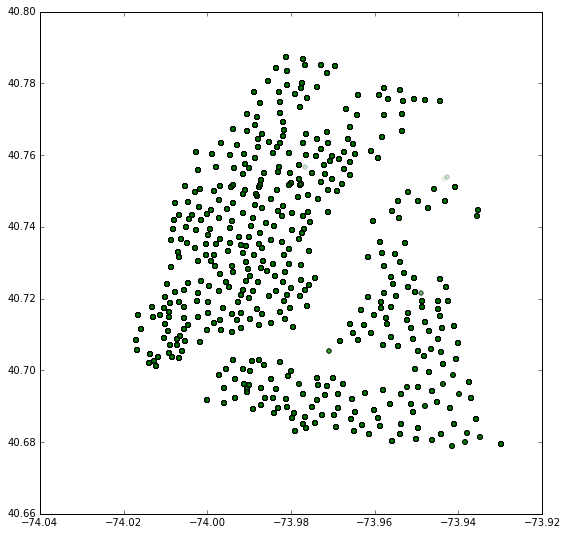

In [17]:
fig,ax = plt.subplots(figsize=(9,9))
ax.